In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from pathlib import Path
path_noto = Path('../fonts/NotoSansCJKkr-Regular.otf')

from matplotlib import font_manager
# font_manager.fontManager.addfont(path_noto)
plt.rc('font', family='Malgun Gothic')

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [2]:
# 전처리
df = pd.read_csv("./seoul.csv") # 원본은 Seoul_Park.csv

df['날짜'] = pd.to_datetime(df['날짜'])

# df['유료합계'] = df['유료합계'].str.replace(',','')
df['유료합계'] = df['유료합계'].astype(float)

# df['무료합계'] = df['무료합계'].str.replace(',','')
df['무료합계'] = df['무료합계'].astype(float)

# df['총계'] = df['총계'].str.replace(',','')
df['총계'] = df['총계'].astype(float)

print(df.head())
# df.info()

          날짜 요일  공휴일     날씨    유료합계    무료합계      총계
0 2016-01-01  금    1  구름 조금  3359.0  1023.0  4382.0
1 2016-01-02  토    1  구름 많음  5173.0  2092.0  7265.0
2 2016-01-03  일    1  구름 많음  3008.0  1549.0  4557.0
3 2016-01-04  월    0  구름 많음   890.0   800.0  1690.0
4 2016-01-05  화    0  구름 많음   416.0   840.0  1256.0


In [3]:
filepath = Path('./seoul.csv')
df.to_csv(filepath, index=False, encoding='utf-8-sig')

## 전처리

In [4]:
x = df[:3]
# x.info()

df = df.drop([0, 1, 2])
# print(x.head())
# print(y.head())

df = df.append(x, ignore_index=True)
# print(df.info())
# print(df.tail())
df.head()

,날짜,요일,공휴일,날씨,유료합계,무료합계,총계
0,2016-01-04,월,0,구름 많음,890.0,800.0,1690.0
1,2016-01-05,화,0,구름 많음,416.0,840.0,1256.0
2,2016-01-06,수,0,구름 조금,367.0,807.0,1174.0
3,2016-01-07,목,0,맑음,309.0,735.0,1044.0
4,2016-01-08,금,0,구름 조금,315.0,611.0,926.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1086 non-null   datetime64[ns]
 1   요일      1086 non-null   object        
 2   공휴일     1086 non-null   int64         
 3   날씨      946 non-null    object        
 4   유료합계    1086 non-null   float64       
 5   무료합계    1086 non-null   float64       
 6   총계      1086 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 59.5+ KB


## EDA 1

Text(0, 0.5, '평균 입장객 수')

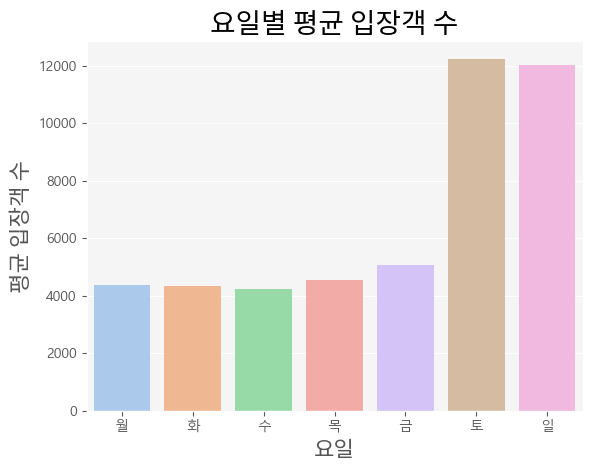

In [6]:
# df_week = df.groupby('요일')['총계'].mean()
colors = sns.color_palette('pastel')[0:7]

fig, ax = plt.subplots()

ax = sns.barplot(data=df, x='요일', y='총계', ci=None, palette=colors)
ax.set_title("요일별 평균 입장객 수", font=path_noto, fontsize=20)
ax.set_xlabel("요일", font=path_noto, fontsize=16)
ax.set_ylabel("평균 입장객 수", font=path_noto, fontsize=16)

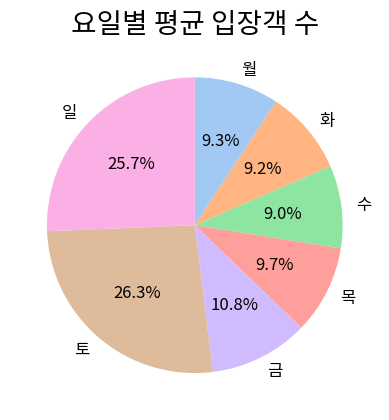

In [7]:
# 요일 가져오기
days = df["요일"].unique()
# print(days)
# days = np.roll(days, -3)[::-1] # 순서 알맞게 배치

# 요일별 합계 저장할 리스트
total_sum = []

# 요일별 합계 저장
for i in days:
    day = df[df["요일"] == i]
    sum = day["총계"].sum()
    total_sum.append(sum)

# 요일별 합계 numpy 배열로 변환: 시각화하려면 필요함
total_sum = np.array(total_sum)

# 색깔 팔레트 설정
# colors = sns.color_palette('pastel')[0:7]

fig, ax = plt.subplots()

# 파이 차트: 색깔 팔레트 사용, 수치 소수점 1자리까지 표시, 시작점 90도
ax.pie(x = total_sum, labels = days, colors=colors, autopct="%.1f%%", startangle=90, counterclock=False, textprops={'font':path_noto, 'fontsize':12})
ax.set_title("요일별 평균 입장객 수", font=path_noto, fontsize=20)
plt.show()

In [8]:
seoul_eda1 = pd.DataFrame({'요일':days, '총 입장객 수':total_sum})
filepath = Path('./seoul_eda1.csv')
seoul_eda1.to_csv(filepath, index=False, encoding='utf-8-sig')

## EDA 2 & 3

In [9]:
eda2 = df.groupby('요일')['총계'].mean().reset_index()

total_week = {
    '요일': ['월', '화', '수', '목', '금', '토', '일'],
    '총 요일 수': [154, 155, 155, 155, 156, 156, 155]
}

tot_week = pd.DataFrame(total_week)
samp = seoul_eda1.merge(tot_week)
seoul_eda2 = samp.merge(eda2)
# df['요일'].value_counts()
seoul_eda2.rename(columns={'총계':'평균 입장객 수'}, inplace=True)
seoul_eda2

,요일,총 입장객 수,총 요일 수,평균 입장객 수
0,월,672868.0,154,4369.272727
1,화,669064.0,155,4316.541935
2,수,655503.0,155,4229.051613
3,목,703494.0,155,4538.670968
4,금,787408.0,156,5047.487179
5,토,1909987.0,156,12243.506410
6,일,1862718.0,155,12017.535484


In [10]:
# s_copy = seoul_eda2.copy()
# a = np.empty((7,))
# a[:] = np.NaN

# s_copy['평균 입장객 수'] = a
# s_copy

In [11]:
# 평균 입장객 수 prefilled
filepath = Path('./seoul_eda2.csv')
seoul_eda2.to_csv(filepath, index=False, encoding='utf-8-sig')

In [12]:
# 평균 입장객 수 NaN
# filepath = Path('./seoul_eda2_2.csv')
# s_copy.to_csv(filepath, index=False, encoding='utf-8-sig')

NameError: name 's_copy' is not defined

## EDA 4 & 5

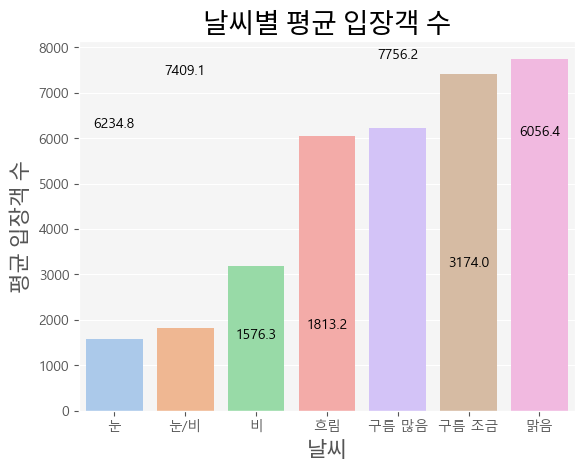

In [13]:
df_weather = df.groupby('날씨')['총계'].mean().reset_index().sort_values(by='총계')

fig, ax = plt.subplots()

ax = sns.barplot(data=df_weather, x='날씨', y='총계', ci=None, palette=colors)
ax.set_title("날씨별 평균 입장객 수", font=path_noto, fontsize=20)
ax.set_xlabel("날씨", font=path_noto, fontsize=16)
ax.set_ylabel("평균 입장객 수", font=path_noto, fontsize=16)

for index, row in df_weather.iterrows():
    ax.text(row.name, row['총계'], round(row['총계'], 1), color='black', ha='center')

plt.show()

Text(0, 0.5, '평균 입장객 수')

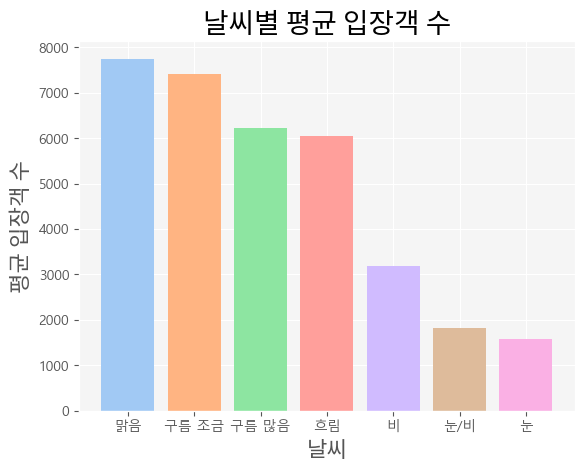

In [109]:
df_w = df.groupby('날씨')['총계'].mean().reset_index().sort_values(by='총계', ascending=False)

fig, ax = plt.subplots()

ax.bar(x=df_w['날씨'], height=df_w['총계'], color=colors)
ax.set_title("날씨별 평균 입장객 수", font=path_noto, fontsize=20)
ax.set_xlabel("날씨", font=path_noto, fontsize=16)
ax.set_ylabel("평균 입장객 수", font=path_noto, fontsize=16)

# for index, row in df_w.iterrows():
#     ax.text(row['날씨'], row['총계'], round(row['총계'], 1), color='black', ha='center')


In [108]:
df_w_exp = df.groupby('날씨')['총계'].sum().reset_index().sort_values(by='총계', ascending=False)

xx = df['날씨'].value_counts().reset_index()
xx.columns = ['날씨', '총 일수']

tot_w = df_w_exp.merge(xx).sort_values(by='총 일수', ascending=False)
tot_w = tot_w.reindex([2, 0, 1, 3, 4, 6, 5])

filepath = Path('./seoul_eda4.csv')
tot_w.to_csv(filepath, index=False, encoding='utf-8-sig')

## EDA 6

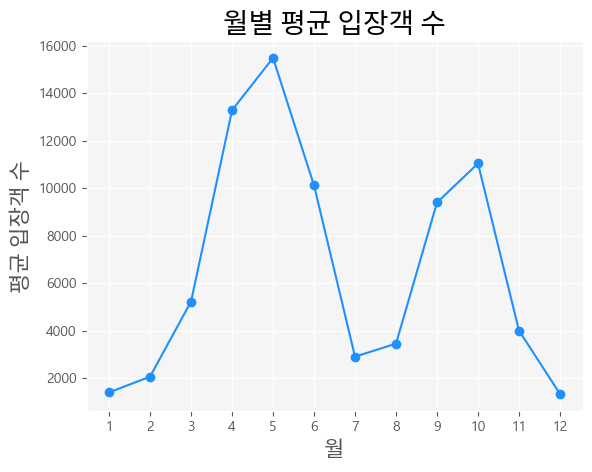

In [65]:
# 월별
df['월'] = df['날짜'].dt.month

df_month = df.groupby('월')['총계'].mean().reset_index()

fig, ax = plt.subplots()

ax.plot(df_month['월'], df_month['총계'], marker='o', color='dodgerblue')
ax.set_title("월별 평균 입장객 수", font=path_noto, fontsize=20)
ax.set_xlabel("월", font=path_noto, fontsize=16)
ax.set_ylabel("평균 입장객 수", font=path_noto, fontsize=16)
ax.set_xticks(range(1, 13))